In [0]:
import numpy as np
import h5py
f = h5py.File('faceimages.mat', 'r')

In [0]:
list(f.keys())

['Database_name', 'Record_Name', 'data', 'height', 'width']

In [0]:
x = np.array(f["data"][:])

In [0]:
xx=np.delete(x,10304,0)

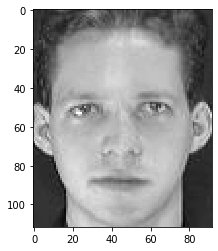

In [0]:
import imageio
import matplotlib.pyplot as plt
xx.shape
yy=xx.reshape((92,112,400))
#yy.shape
first=yy[:,:,0].T
plt.imshow(first,cmap='gray')

In [0]:
xx_mean=np.mean(xx,axis=1,keepdims=True)
xx_dash=xx-xx_mean

In [0]:
xx_cov=np.cov(xx_dash)
xx_cov.shape

(10304, 10304)

In [0]:
eigvals, eigvecs = np.linalg.eig(xx_cov)

In [0]:
eigvecs.shape

(10304, 10304)

In [0]:

idx=eigvals.argsort()[::-1]
eigvals=eigvals[idx]
eigvecs=eigvecs[:,idx]

In [0]:
A=eigvecs
Y=np.dot(A.T,xx_dash)
Y.shape

(10304, 400)

16.27841374655177
13.40145072212634
2.150015771052361e-12


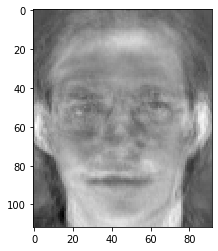

In [0]:
recX50=np.dot(A[:,:50],Y[:50,0])
print(np.sqrt(np.sum(abs(recX50-xx_dash[:,0])**2)/len(recX50)))
#recX50=recX50.reshape((92,112))
#plt.imshow(np.real(recX50),cmap='gray')

recX100=np.dot(A[:,:100],Y[:100,0])
print(np.sqrt(np.sum(abs(recX100-xx_dash[:,0])**2)/len(recX100)))
recX100=recX100.reshape((92,112))
plt.imshow(np.real(recX100.T),cmap='gray')

recX400=np.dot(A[:,:400],Y[:400,0])
print(np.sqrt(np.sum(abs(recX400-xx_dash[:,0])**2)/len(recX400)))
#recX400=recX400.reshape((92,112))
#plt.imshow(np.real(recX400.T),cmap='gray')

In [0]:
recX50=np.dot(A[:,:50],Y[:50,:])
print(np.sqrt(np.sum(abs(recX50-xx_dash)**2)/len(recX50)))

recX100=np.dot(A[:,:100],Y[:100,:])
print(np.sqrt(np.sum(abs(recX100-xx_dash)**2)/len(recX100)))

recX400=np.dot(A[:,:400],Y[:400,:])
print(np.sqrt(np.sum(abs(recX400-xx_dash)**2)/len(recX400)))

337.86825467830545
260.4300110076089
4.166863303540342e-11


In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import h5py
f = h5py.File('faceimages.mat','r')
x = f["data"]

In [0]:
x = np.delete(x,10304,0)

In [0]:
y = x.reshape(92,112,400)

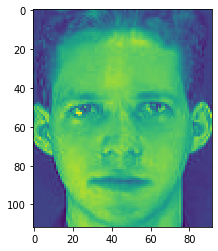

In [0]:
plt.imshow(y[:,:,0].T)

In [0]:
x_mean = np.mean(x,axis=1,keepdims=True)

In [0]:
x_tilde = x - x_mean

In [0]:
x_cov = x_tilde@x_tilde.T

In [0]:
x_cov = x_cov/399

In [0]:
x_cov

array([[1279.32656015, 1268.83255639, 1259.75737469, ...,   21.6276817 ,
          -2.07218045,  -58.63463033],
       [1268.83255639, 1264.08210526, 1257.36784461, ...,   18.08466165,
          -5.59197995,  -62.75155388],
       [1259.75737469, 1257.36784461, 1255.29693609, ...,   18.8168797 ,
          -4.37694236,  -59.17181078],
       ...,
       [  21.6276817 ,   18.08466165,   18.8168797 , ..., 1704.12428571,
        1668.79298246, 1615.49001253],
       [  -2.07218045,   -5.59197995,   -4.37694236, ..., 1668.79298246,
        1777.20802005, 1780.6726817 ],
       [ -58.63463033,  -62.75155388,  -59.17181078, ..., 1615.49001253,
        1780.6726817 , 1939.41698622]])

In [0]:
eig_vals, eig_vecs = np.linalg.eig(x_cov)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


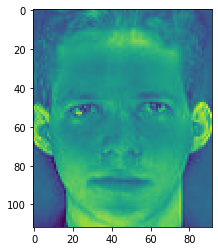

In [0]:
u = eig_vecs[:,0:400]
y_low = u@u.T@x_tilde
rec = y_low
y_low = y_low.reshape(92,112,400)
y_low = np.array(y_low,dtype=float)
plt.imshow(y_low[:,:,0].T)

In [0]:
err = np.sqrt(np.mean((rec-x)**2))

In [0]:
err

(116.73032468347841+1.2365606295642849e-20j)

In [0]:
x.shape

(10304, 400)